<a href="https://colab.research.google.com/github/eumiejhong/Anti-spoofing/blob/master/Half_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
def imCrop(x):
    height,width,depth = x.shape
    return x[height , :width//2] , x[height, width//2:]

In [5]:
import numpy as np
import cv2

img_smp = cv2.imread('/content/drive/My Drive/fake_random/fakeins.jpg')
img_smp = np.array(img_smp)
img_smp.shape

(720, 1080, 3)

In [6]:
def half_left(image):
    return image[:, :image.shape[1]//2]
  
def half_right(image):
    return image[:, image.shape[1]//2:]

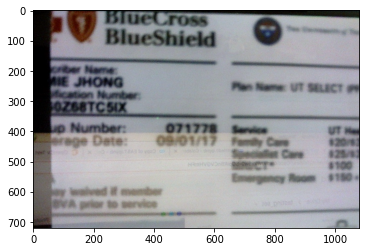

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_smp)

(720, 540, 3)


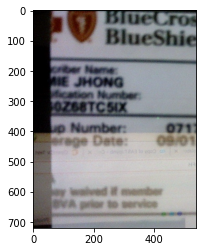

In [8]:
testing = half_left(img_smp)
print(testing.shape)
plt.imshow(testing)

In [17]:
import numpy as np
import os
import glob
import tensorflow as tf
from keras import backend as K
import numpy as np
from tqdm import tqdm

# List all files in dir
fake_files = glob.glob('/content/drive/My Drive/fake_random/*.jpg')
real_files = glob.glob('/content/drive/My Drive/real_random/*.jpg')

In [29]:
data = []
labels = []

for i in tqdm(fake_files):
      image_fake = cv2.imread(i)
      image_fake = np.array(image_fake)
      train_fake = half_left(image_fake)
      for x in train_fake:
          data.append(x)
          labels.append(0)

for j in tqdm(real_files):
      image_real = cv2.imread(j)
      image_real = np.array(image_real)
      train_real = half_left(image_real)
      for y in train_real:
          data.append(y)
          labels.append(1)

data = np.array(data)
labels = np.array(labels)

100%|██████████| 20/20 [00:00<00:00, 38.71it/s]


In [ ]:
imgs = get_imgs()
res = []
for img in imgs:
    res.append(imresize(img, (82, 100)))

In [30]:
data.shape

(28800, 540, 3)

In [31]:
labels.shape

(28800,)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, ytrain, ytest = train_test_split(data, labels, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)

In [33]:
X_train.shape

(23040, 540, 3)

In [34]:
ytrain.shape

(23040,)

In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytrain=to_categorical(ytrain)
ytrain=np.array(ytrain)

ytest = le.fit_transform(ytest)
ytest=to_categorical(ytest)
ytest=np.array(ytest)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from keras.models import Model
import tensorflow
from keras.optimizers import SGD

model = tensorflow.keras.Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(224, 224, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(120, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(750, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      4864      
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 120)     69240     
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 120)     480       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 120)      

In [ ]:
model.fit(X_train, ytrain,batch_size=16,epochs=10,shuffle=True,verbose=1,validation_data=(X_test, ytest))
model.save('/content/drive/My Drive/testing_set/halfcard_model.h5')
print("Saved model to disk")